In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from network import Network
import numpy as np
import seaborn as sns
import pandas as pd
from config import Config, Globals
from data_generator import DataGenerator
import matplotlib.pyplot as plt

### Init datasets

In [3]:
train, test, valid = DataGenerator.GetTrainTestValid()

In [4]:
n = Network(Config.layers)
n

[Layer - shape: (256, 100), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (100, 100), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (100, 50), f(a): None, activation: <class 'activation_functions.ReLu'>, Layer - shape: (50, 4), f(a): None, activation: <class 'activation_functions.Sigmoid'>] Softmax: False L1: 0.0, L2: 0.0001

### Train the network

In [5]:
train_acc, valid_acc = n.fit(train.x, train.y, valid=valid, epochs=Globals.EPOCHS)
df_train = pd.DataFrame(train_acc, columns=['epoch', 'loss'])
df_valid = pd.DataFrame(valid_acc, columns=['epoch', 'loss'])


### Calculate test loss

In [6]:
score = 0
for x,y in zip(test.x, test.y):
    score += Globals.LOSS_FUNCION.f(y, n.predict(x))

score = score / len(test.x)

In [7]:

df = pd.DataFrame()
# df['epoch'] = df_train.epoch
df['Train Loss'] = df_train.loss
df['Validation Loss'] = df_valid.loss
df['Test Loss'] = np.nan
for i in range(5):
    df.loc[len(df.index)] = [np.nan, np.nan, score]


In [8]:
df

,Train Loss,Validation Loss,Test Loss
0,0.437040,0.341749,NaN
1,0.195159,0.182090,NaN
2,0.102672,0.134839,NaN
3,0.072228,0.115357,NaN
4,0.058205,0.099615,NaN
...,...,...,...
100,NaN,NaN,0.028122
101,NaN,NaN,0.028122
102,NaN,NaN,0.028122
103,NaN,NaN,0.028122


### Plot loss

<AxesSubplot:>

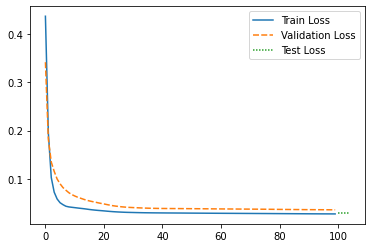

In [9]:
sns.lineplot(data=df )

### Test set accuracy

In [10]:
correct = 0
m = len(test.y)
for x,y in zip(test.x, test.y):

    pred = n.predict(x)
    correct += np.argmax(pred) == np.argmax(y)

    
print(f'{correct} / {m} correct. Accuracy {np.round(correct/m, 3)}')

70 / 70 correct. Accuracy 1.0


### Regularization cost

In [11]:
o1_df = pd.DataFrame(n.omega1, columns=['epoch', 'L1 - loss'])
o2_df = pd.DataFrame(n.omega2, columns=['epoch', 'L2 - loss'])
df_reg = o1_df.merge(o2_df, on='epoch').drop(columns=['epoch'])

<AxesSubplot:>

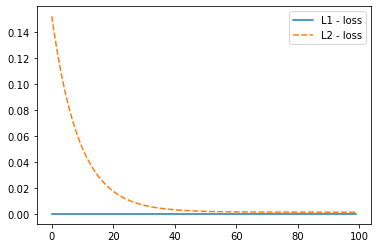

In [12]:
sns.lineplot(data=df_reg)

### Loss including regularization terms

<AxesSubplot:>

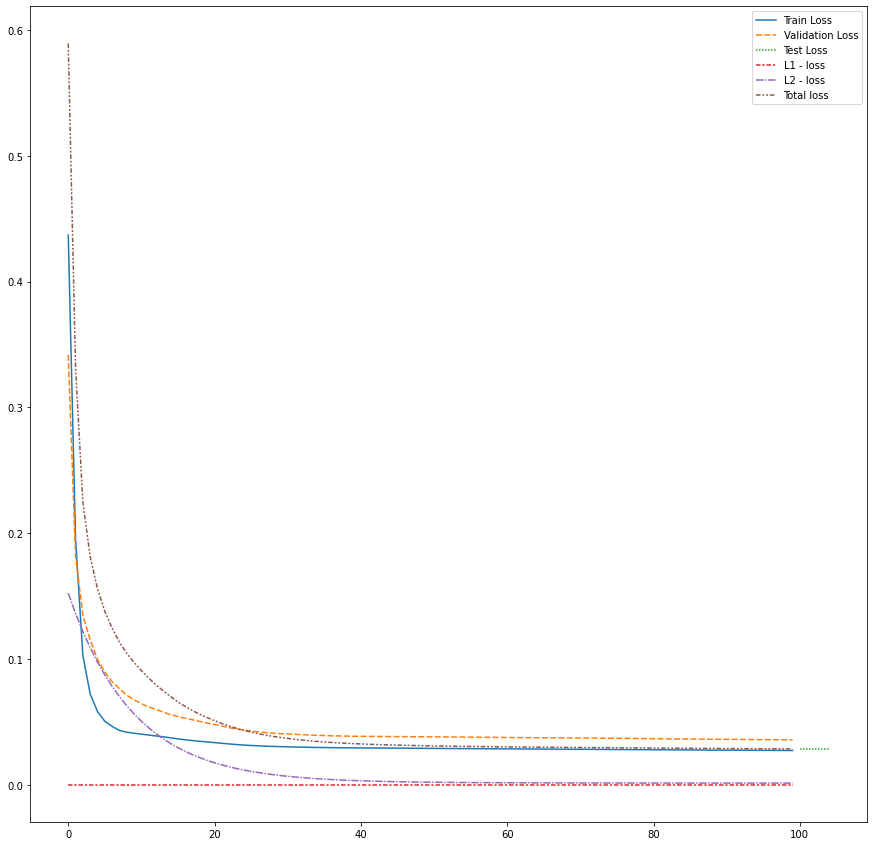

In [13]:
plt.figure(figsize=(15,15))
df2 = df.copy().join(df_reg)
df2['Total loss'] = df['Train Loss'] + o1_df['L1 - loss'] + o2_df['L2 - loss']
sns.lineplot(data=df2)